# PROJETO Gestão Criptoativos

###### by: AdilsonCJ

#### || Coletar Dados API . Gerar uma base csv a partir dessa coleta ||

#### || Analisar Carteira de CriptoAtivos ||

#### || Salvar Pesquisa de Interesse em um csv ||

##### || Coletar Dados a partir do Yahoo Finance. Gerar uma base csv a partir dessa coleta ||

In [3]:
pip install yfinance

In [112]:
import yfinance as yf
import mplfinance as mpl 

'''
More info about the yfinance library

https://algotrading101.com/learn/yfinance-guide/

https://github.com/matplotlib/mplfinance/blob/master/examples/using_lines.ipynb

'''

# Função Aplica o mecanismo de busca no Yahoo da Moeda em questão
def apply_yf_consult(criptocurrency, yf_period="max", yf_interval='1d'):
        criptoasset = criptocurrency + "-USD"
        dataframe = yf.Ticker(criptoasset).history(period=yf_period,interval=yf_interval) 
        return dataframe
    
# Limpa o Dataframe para plotar o gráfico
def clear_dataframe_candle(dataframe):
    dataframe = dataframe[['Open','High','Low','Close']] 
    return dataframe

# Plota o gráfico de Candle
def plot_candle(dataframe,Data_Compra="2021-01-01"):
    return mpl.plot(dataframe,type="candle", mav =(3,6,9),title = "CandleStick Price",style="yahoo",vlines=Data_Compra)

##### || Teste das Funções ||

C:\Users\A324150\Anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


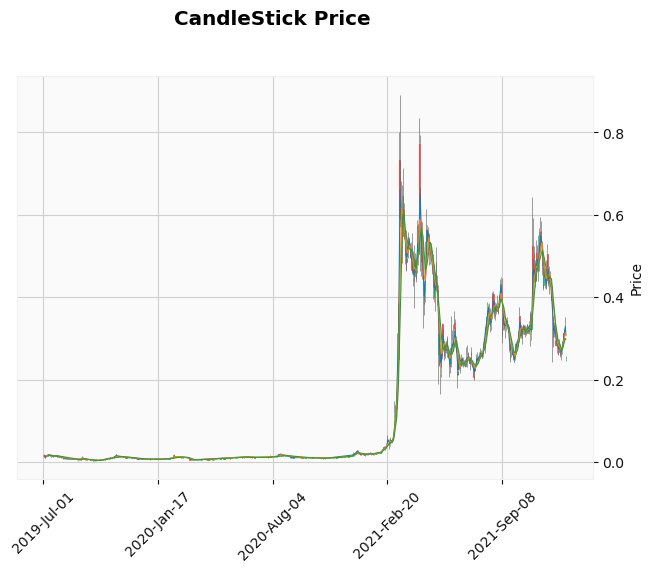

In [81]:
df_CHZ
df_CHZ = clear_dataframe_candle(df_CHZ)
plot_candle(df_CHZ)

### || EX01 : Avaliação dos Ganhos / Perdas em uma Operação Específica ||

##### Para uma operação específica, avalia o ganho / perda e gera um gráfico de candlesticks apontando o momento da compra (Análise Técnica)

Bem vindo ao analisador de Criptoativo!

Entre com o Criptoativo adquirido (Código Três Dígitos ex: SLP): SLP
Entre com o valor da Data da Compra (Formato Americano yyyy-mm-dd): 2021-09-04
Entre com o Montante da Compra (ex: 1095.94): 10485.12

O montante em USD ganho com a transação de SLP é de $-1133.11

Data da Compra Acentuada pela linha azul


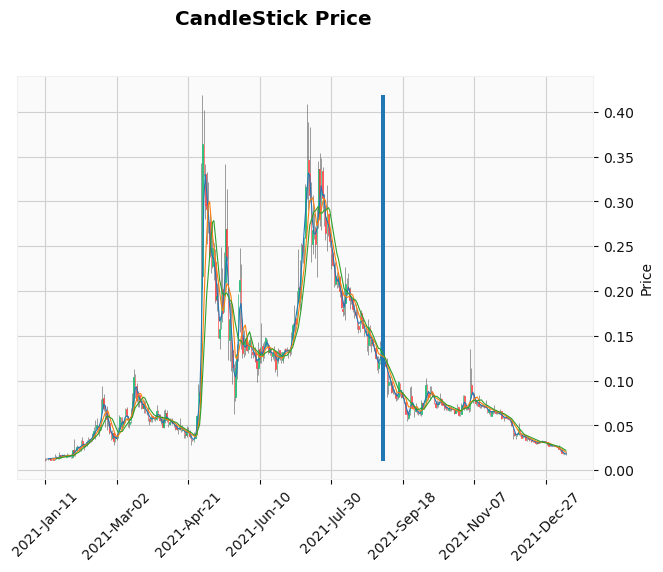

In [173]:
print('Bem vindo ao analisador de Criptoativo!')
# BTT
criptoativo = input('\nEntre com o Criptoativo adquirido (Código Três Dígitos ex: SLP): ')
# 2021-08-13
Data_Compra = input('Entre com o valor da Data da Compra (Formato Americano yyyy-mm-dd): ')
# 15623,8
Montante_Compra = float(input('Entre com o Montante da Compra (ex: 1095.94): '))

df_request = apply_yf_consult(criptoativo,yf_period='1y')
df_request = clear_dataframe_candle(df_request)
df_request.head(3)

Valor_Compra = df_request.loc[Data_Compra]['Close']
Valor_Atual = df_request['Close'][-1]

Resultado = Montante_Compra*(Valor_Atual - Valor_Compra)

print(f'\nO montante em USD ganho com a transação de {criptoativo} é de ${round(Resultado,2)}')

print('\nData da Compra Acentuada pela linha azul')

plot_candle(df_request,Data_Compra)

### || EX02 : Avaliando os Ganhos / Perdas em uma Carteira Genérica ||

##### Avalia o conteúdo de uma carteira : Código do Ativo / Data da Compra / Montante da Compra

In [192]:
wallet_res = ['ETH',
'ADA',
'SHIB',
'VET',
'CHZ',
'WIN',
'BTT',
'SLP',
'XEM',
'BTT',
'FUN',
'LINA']

wallet_res_data = ['2021-05-31',
'2021-05-31',
'2021-06-28',
'2021-09-25',
'2021-06-20',
'2021-05-13',
'2021-01-16',
'2021-09-14',
'2021-10-30',
'2021-11-02',
'2021-12-24',
'2021-05-30']

wallet_res_amount = ['0.07',
'1159.18',
'6437124.00',
'1250.17',
'4722.15',
'244719.00',
'15623.80',
'10953.65',
'5014.14',
'49833.72',
'25303.68',
'4026.52']

In [193]:
import pandas as pd

df_cripto = pd.DataFrame(wallet_res)
df_cripto.rename(columns={0: 'Criptoativo'}, inplace = True)

df_data = pd.DataFrame(wallet_res_data)
df_data.rename(columns={0:'Data'}, inplace = True)

df_montante = pd.DataFrame(wallet_res_amount)
df_montante.rename(columns={0:'Montante'}, inplace = True)


df_carteira = pd.concat([df_cripto, df_data, df_montante],axis=1)
df_carteira

,Criptoativo,Data,Montante
0,ETH,2021-05-31,0.07
1,ADA,2021-05-31,1159.18
2,SHIB,2021-06-28,6437124.00
3,VET,2021-09-25,1250.17
4,CHZ,2021-06-20,4722.15
5,WIN,2021-05-13,244719.00
6,BTT,2021-01-16,15623.80
7,SLP,2021-09-14,10953.65
8,XEM,2021-10-30,5014.14
9,BTT,2021-11-02,49833.72


In [194]:
def evaluate_wallet(criptoativo, Data_Compra, Montante_Compra):
    df_request = apply_yf_consult(criptoativo,yf_period='max')
    df_request = clear_dataframe_candle(df_request)
    
    Montante_Compra = float(Montante_Compra)

    Valor_Compra = df_request.loc[Data_Compra]['Close']
    Valor_Atual = df_request['Close'][-1]

    Resultado = Montante_Compra*(Valor_Atual - Valor_Compra)
    
    print(f'\nO montante em USD ganho com a transação de {criptoativo} é de ${round(Resultado,2)}')
    
    return Resultado

In [195]:
acumulado_wallet = []

for i in range(0,12):
    
    acumulado_wallet.append(evaluate_wallet(df_carteira.loc[i]['Criptoativo'], df_carteira.loc[i]['Data'], df_carteira.loc[i]['Montante']))
    
print(f'\nO Acumulado, em USD, da sua carteira é ${round(sum(acumulado_wallet),3)}')    


O montante em USD ganho com a transação de ETH é de $35.93

O montante em USD ganho com a transação de ADA é de $-645.24

O montante em USD ganho com a transação de SHIB é de $127.36

O montante em USD ganho com a transação de VET é de $-18.08

O montante em USD ganho com a transação de CHZ é de $-130.93

O montante em USD ganho com a transação de WIN é de $-126.82

O montante em USD ganho com a transação de BTT é de $33.33

O montante em USD ganho com a transação de SLP é de $-693.95

O montante em USD ganho com a transação de XEM é de $-357.38

O montante em USD ganho com a transação de BTT é de $-78.83

O montante em USD ganho com a transação de FUN é de $-11.93

O montante em USD ganho com a transação de LINA é de $0.84

O Acumulado, em USD, da sua carteira é $-1865.711


### || EX03 : Salvar Moedas de Interesse em uma Base Excel ||

##### Gera uma lista de ativos inputada pelo usuário. Salva a lista como um dicionário e depois a exporta para um Arquivo Excel

In [202]:
list_ativos = []

evaluation = input('Deseja Adicionar algum ativo na geração do .csv? (Y/N)')

while evaluation == "Y":
    evaluation_asset = input('Entre com o código de três dígitos para adicionar na consulta (Ex: BTC,SLP))')
    list_ativos.append(evaluation_asset)
    evaluation = input('\nDeseja Adicionar algum ativo na geração do .csv? (Y/N)')
    
print(f'Geração Finalizada! {list_ativos}')

Deseja Adicionar algum ativo na geração do .csv? (Y/N)Y
Entre com o código de três dígitos para adicionar na consulta (Ex: BTC,SLP))BTC

Deseja Adicionar algum ativo na geração do .csv? (Y/N)Y
Entre com o código de três dígitos para adicionar na consulta (Ex: BTC,SLP))SLP

Deseja Adicionar algum ativo na geração do .csv? (Y/N)Y
Entre com o código de três dígitos para adicionar na consulta (Ex: BTC,SLP))VET

Deseja Adicionar algum ativo na geração do .csv? (Y/N)N
Geração Finalizada! ['BTC', 'SLP', 'VET']


In [221]:
dict_ativos = {}

for i in range(0,(len(list_ativos))):
    dict_ativos["key%s" %list_ativos[i]] = apply_yf_consult(list_ativos[i])
    
dict_ativos

{'keyBTC':                     Open          High           Low         Close  \
 Date                                                                 
 2014-09-17    465.864014    468.174011    452.421997    457.334015   
 2014-09-18    456.859985    456.859985    413.104004    424.440002   
 2014-09-19    424.102997    427.834991    384.532013    394.795990   
 2014-09-20    394.673004    423.295990    389.882996    408.903992   
 2014-09-21    408.084991    412.425995    393.181000    398.821014   
 ...                  ...           ...           ...           ...   
 2022-01-07  43153.570312  43153.570312  41077.445312  41557.902344   
 2022-01-08  41561.464844  42228.941406  40672.277344  41733.941406   
 2022-01-09  41734.726562  42663.949219  41338.160156  41911.601562   
 2022-01-10  41910.230469  42199.484375  39796.570312  41821.261719   
 2022-01-11  41778.222656  42971.421875  41420.066406  42955.417969   
 
                  Volume  Dividends  Stock Splits  
 Date        

In [238]:
from datetime import datetime

data_atual = datetime.today().strftime('y%Y-m%m-d%d')
writer=pd.ExcelWriter(f"Cotação Criptoativos {data_atual}.xlsx") 

for criptoasset in dict_ativos:
    dict_ativos[criptoasset].to_excel(writer,sheet_name=criptoasset)

writer.save()